## IMPORT NECESSARY LIBS

In [143]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from keras.layers import *
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import R2Score
from keras.callbacks import ModelCheckpoint

## Read Data and exploratory analysis

In [2]:
unprocessed_data = pd.read_csv("../dataset/turkey_car_market.csv")

In [3]:
unprocessed_data.shape

(9044, 15)

In [4]:
unprocessed_data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [5]:
unprocessed_data.dtypes

İlan Tarihi        object
Marka              object
Arac Tip Grubu     object
Arac Tip           object
Model Yıl         float64
Yakıt Turu         object
Vites              object
CCM                object
Beygir Gucu        object
Renk               object
Kasa Tipi          object
Kimden             object
Durum              object
Km                  int64
Fiyat               int64
dtype: object

In [6]:
unprocessed_data.describe()

,Model Yıl,Km,Fiyat
count,9044.000000,9.044000e+03,9.044000e+03
mean,2011.824082,1.358128e+05,1.480696e+05
std,6.609711,9.342152e+04,2.219779e+05
min,1959.000000,0.000000e+00,5.500000e+03
25%,2010.000000,6.800000e+04,6.093750e+04
50%,2014.000000,1.250000e+05,9.550000e+04
75%,2017.000000,1.941300e+05,1.535625e+05
max,2020.000000,1.850000e+06,5.086500e+06


In [7]:
# drop İlan Tarihi, Arac Tipi, Kimden, Arac Tip Grubu 	
unprocessed_data.drop(["İlan Tarihi","Arac Tip", "Kimden", "Arac Tip Grubu"], axis=1, inplace=True)

In [8]:
unprocessed_data.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
0,Jaguar,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,2. El,26100,634500
1,Acura,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,2. El,127000,151500
2,Acura,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,2. El,175000,19750
3,Acura,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,2. El,325,52000
4,Acura,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,2. El,207000,148750


In [9]:
# unique values
for i in ["Marka", "Yakıt Turu", "Vites", "Renk", "Kasa Tipi", "Durum"]:
    print(unprocessed_data[i].unique())

['Jaguar' 'Acura' 'Jeep' 'Hyundai' 'Alfa Romeo' 'Audi' 'Mercedes'
 'Volkswagen' 'Land Rover' 'BMW' 'Dacia' 'Renault' 'Peugeot' 'Chevrolet'
 'Chery' 'Citroen' 'Chrysler' 'Fiat' 'Ford' 'Honda' 'Geely' 'Infiniti'
 'Isuzu' 'Kia' 'Lada' 'Maserati' 'Mazda' 'Mini' 'Mitsubishi' 'Nissan'
 'Opel' 'Porsche' 'Rover' 'Seat' 'Skoda' 'Tofaş']
['Dizel' 'Benzin/LPG' 'Hibrit' 'Benzin' 'Elektrik']
['Otomatik Vites' 'Yarı Otomatik Vites' 'Düz Vites']
['Lacivert ' 'Mavi ' 'Turkuaz ' 'Kahverengi ' 'Beyaz ' 'Kırmızı ' 'Gri '
 'Siyah ' 'Füme ' 'Gümüş Gri ' 'Diğer ' 'Bordo ' 'Bej ' 'Mor ' 'Yeşil '
 'Altın ' 'Turuncu ' 'Sarı ' 'Şampanya ' 'Gümüş ' 'Bal Rengi '
 'Kum Rengi ' 'Ihlamur ' 'Eflatun ' 'Pembe ' 'Zeytin Gri ' 'Amarant '
 'Krem ']
['Hatchback 5 Kapı' 'Sedan' 'Roadster' 'Arazi Aracı' 'Diğer'
 'Hatchback 3 Kapı' 'Spor / Coupe' 'Station Wagon' 'Camlı Van'
 'Üstü Açık / Cabriolet' 'MPV' 'Crossover' 'Minivan']
['2. El' '0 km' 'Klasik' 'Hasarlı']


In [10]:
## CCM and Beygir Gucu transformation
data = unprocessed_data.copy()

In [ ]:
data["CCM"].replace("[ a-zA-Zıü]", "", regex=True, inplace=True)
data["Beygir Gucu"].replace("[ a-zA-Zıü]", "", regex=True, inplace=True)

In [12]:
data.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
0,Jaguar,2017.0,Dizel,Otomatik Vites,1801-2000,176-200,Lacivert,Hatchback 5 Kapı,2. El,26100,634500
1,Acura,2015.0,Dizel,Yarı Otomatik Vites,1301-1600,101-125,Mavi,Sedan,2. El,127000,151500
2,Acura,1994.0,Benzin/LPG,Düz Vites,1301-1600,101-125,Turkuaz,Sedan,2. El,175000,19750
3,Acura,2013.0,Dizel,Düz Vites,1301-1600,76-100,Kahverengi,Sedan,2. El,325,52000
4,Acura,2010.0,Dizel,Otomatik Vites,1801-2000,151-175,Beyaz,Sedan,2. El,207000,148750


In [13]:
data.isna().sum()

Marka          0
Model Yıl      0
Yakıt Turu     0
Vites          0
CCM            0
Beygir Gucu    0
Renk           0
Kasa Tipi      0
Durum          0
Km             0
Fiyat          0
dtype: int64

In [14]:
# apply function for removing
def seperator(x):
    y = x.split("-")
    return y[0]

In [15]:
# remove hypen and select first value for ccm and beygir
data["CCM"] = data["CCM"].apply(seperator)
data["Beygir Gucu"] = data["Beygir Gucu"].apply(seperator)

In [16]:
data.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
0,Jaguar,2017.0,Dizel,Otomatik Vites,1801,176,Lacivert,Hatchback 5 Kapı,2. El,26100,634500
1,Acura,2015.0,Dizel,Yarı Otomatik Vites,1301,101,Mavi,Sedan,2. El,127000,151500
2,Acura,1994.0,Benzin/LPG,Düz Vites,1301,101,Turkuaz,Sedan,2. El,175000,19750
3,Acura,2013.0,Dizel,Düz Vites,1301,76,Kahverengi,Sedan,2. El,325,52000
4,Acura,2010.0,Dizel,Otomatik Vites,1801,151,Beyaz,Sedan,2. El,207000,148750


In [17]:
data.replace("", np.nan, regex=True, inplace=True)

In [18]:
# astype function
data.dropna(inplace=True)

In [19]:
data["CCM"] = data["CCM"].astype(int)
data["Beygir Gucu"] = data["Beygir Gucu"].astype(int)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3451 entries, 0 to 9043
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Marka        3451 non-null   object 
 1   Model Yıl    3451 non-null   float64
 2   Yakıt Turu   3451 non-null   object 
 3   Vites        3451 non-null   object 
 4   CCM          3451 non-null   int64  
 5   Beygir Gucu  3451 non-null   int64  
 6   Renk         3451 non-null   object 
 7   Kasa Tipi    3451 non-null   object 
 8   Durum        3451 non-null   object 
 9   Km           3451 non-null   int64  
 10  Fiyat        3451 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 323.5+ KB


## Eda

In [21]:
data1 = data.copy()

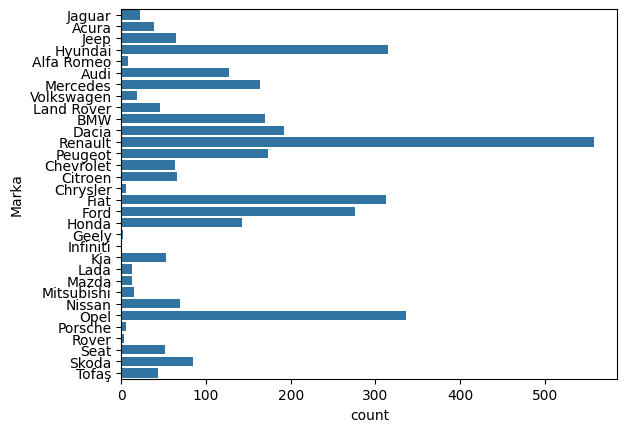

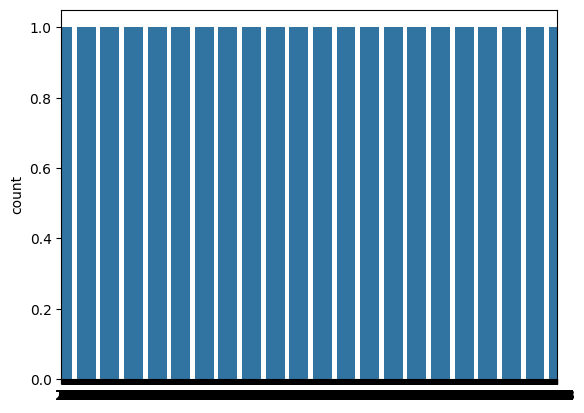

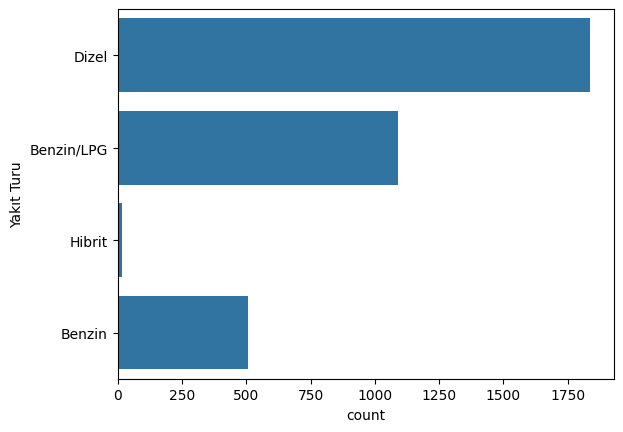

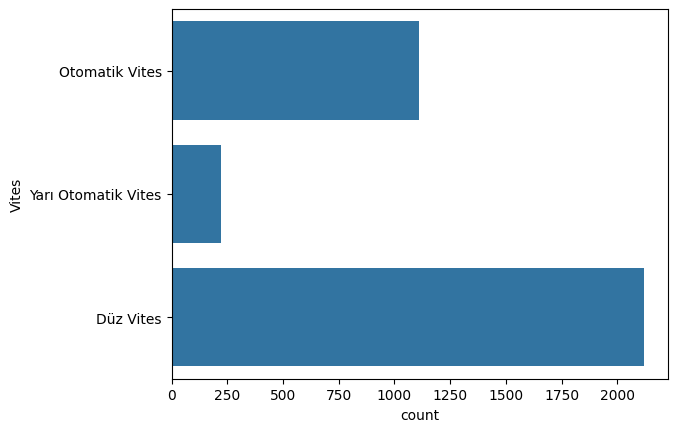

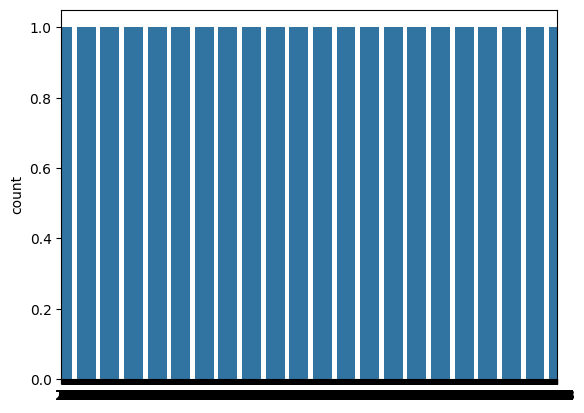

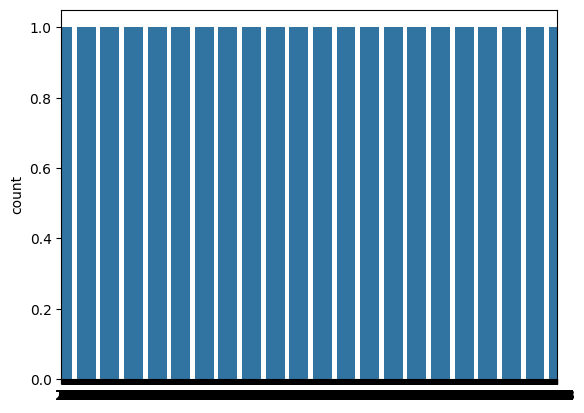

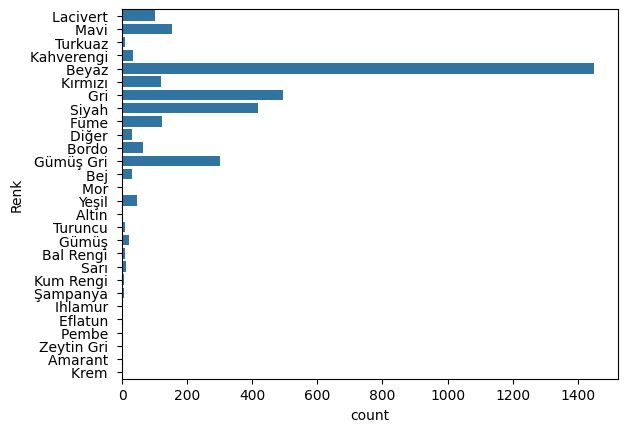

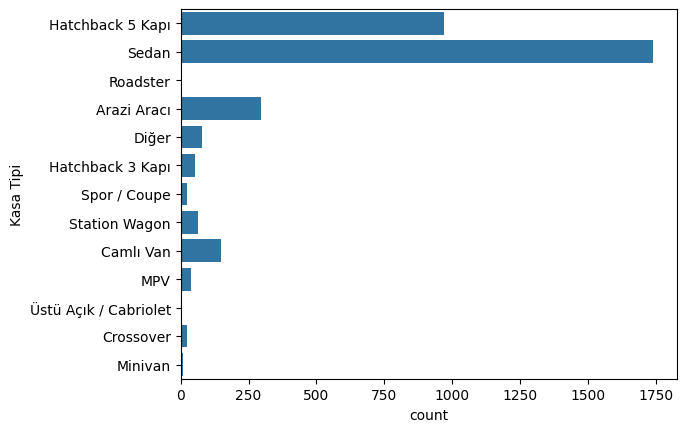

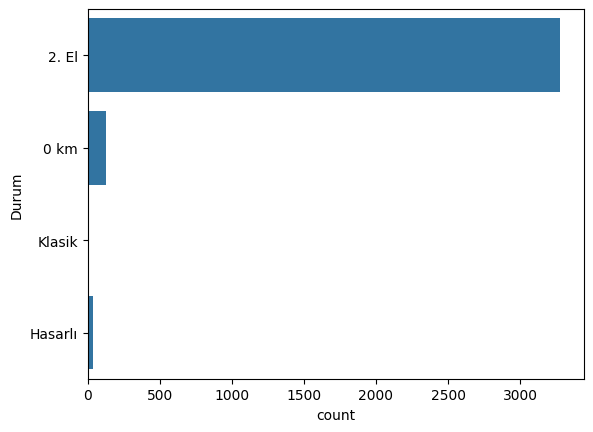

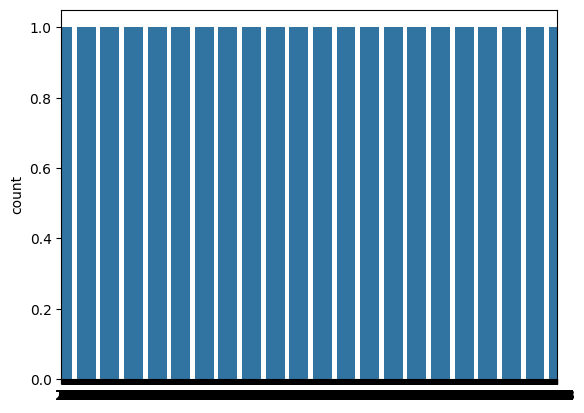

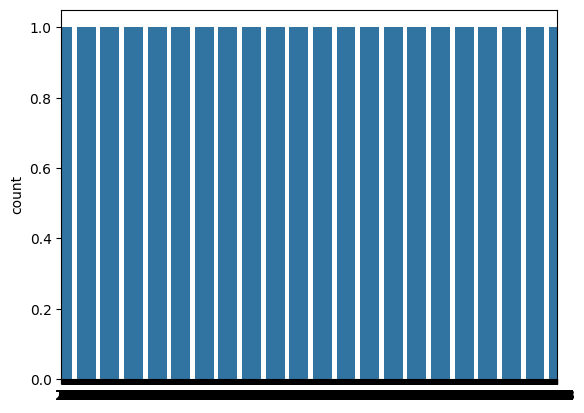

In [26]:
for i in data1.columns:
    sns.countplot(data1[i])
    plt.show()

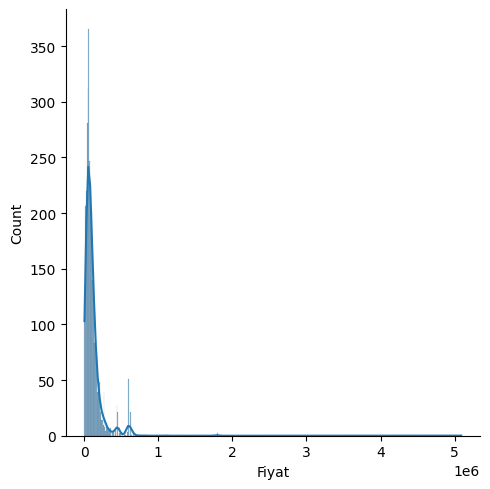

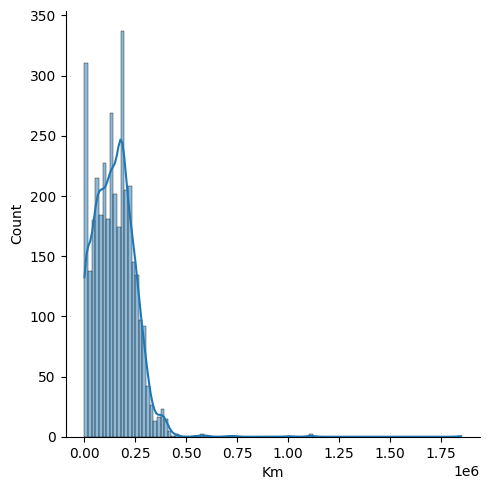

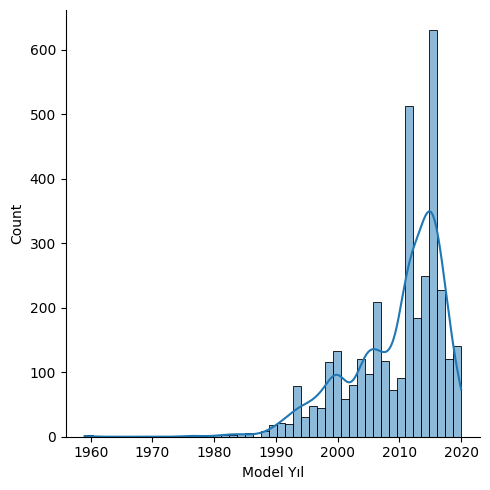

In [27]:
# displots
for i in ["Fiyat", "Km", "Model Yıl"]:
    sns.displot(data1[i], kde=True)
    plt.show()

<Axes: >

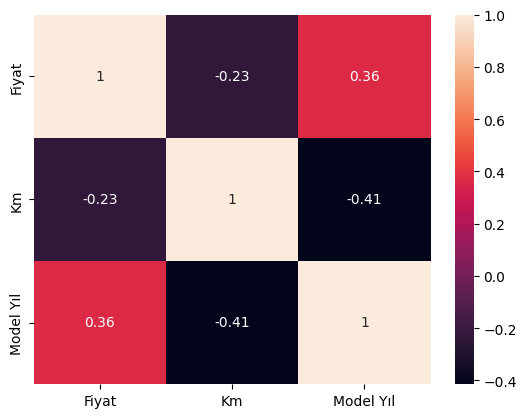

In [28]:
# correlation
sns.heatmap(data1[["Fiyat", "Km", "Model Yıl"]].corr(), annot=True)

In [81]:
# km +, fiyat -
# model +, fiyat +
# km +, model -

In [22]:
# remove outliers
data1 = data1.sort_values(by="Model Yıl")


In [23]:
length_of_full_data = len(data1)
ninety_nine_percent = int(len(data1)*99 / 100)
start_step = length_of_full_data - ninety_nine_percent
start_step

35

In [24]:
data_processed = data1.copy()
data_processed = data1.iloc[36:, :]

In [25]:
data_processed.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
4362,Mercedes,1990.0,Dizel,Düz Vites,1801,76,Kahverengi,Sedan,2. El,167000,35000
4352,Mercedes,1990.0,Benzin/LPG,Otomatik Vites,1801,101,Siyah,Sedan,2. El,240000,55900
4312,Mazda,1990.0,Benzin/LPG,Düz Vites,1301,101,Mavi,Sedan,2. El,1111111,16500
9017,Tofaş,1990.0,Benzin/LPG,Düz Vites,1300,51,Krem,Sedan,2. El,100000,13500
8757,Skoda,1990.0,Benzin/LPG,Düz Vites,1300,51,Bej,Hatchback 5 Kapı,2. El,22222,12500


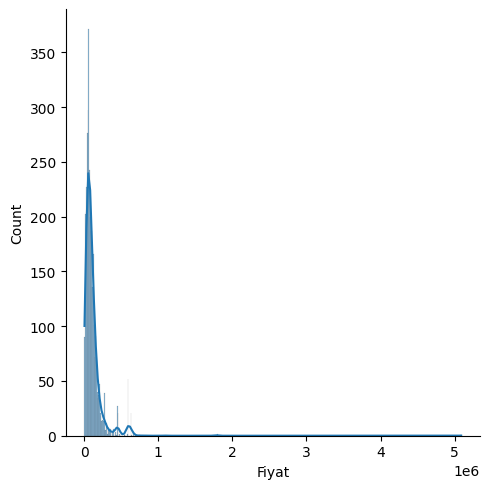

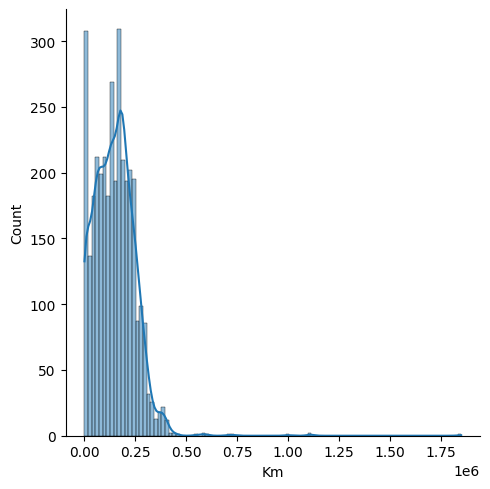

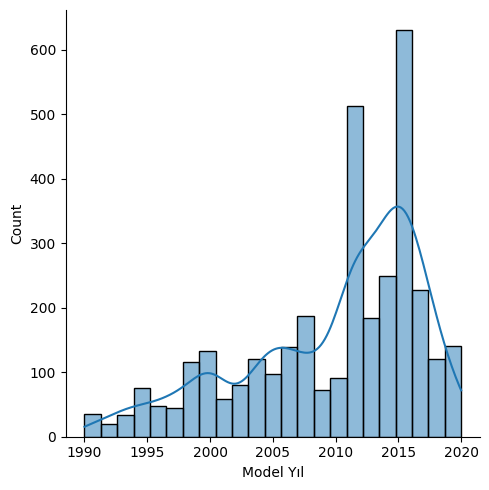

In [113]:
# displot 2
for i in ["Fiyat", "Km", "Model Yıl"]:
    sns.displot(data_processed[i], kde=True)
    plt.show()

In [26]:
data_processed.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
4362,Mercedes,1990.0,Dizel,Düz Vites,1801,76,Kahverengi,Sedan,2. El,167000,35000
4352,Mercedes,1990.0,Benzin/LPG,Otomatik Vites,1801,101,Siyah,Sedan,2. El,240000,55900
4312,Mazda,1990.0,Benzin/LPG,Düz Vites,1301,101,Mavi,Sedan,2. El,1111111,16500
9017,Tofaş,1990.0,Benzin/LPG,Düz Vites,1300,51,Krem,Sedan,2. El,100000,13500
8757,Skoda,1990.0,Benzin/LPG,Düz Vites,1300,51,Bej,Hatchback 5 Kapı,2. El,22222,12500


In [115]:
# Encoding Labels

In [ ]:
encoder = LabelEncoder()
data_processed["Marka"] = encoder.fit_transform(data_processed["Marka"])
data_processed["Yakıt Turu"] = encoder.fit_transform(data_processed["Yakıt Turu"])
data_processed["Vites"] = encoder.fit_transform(data_processed["Vites"])
data_processed["Renk"] = encoder.fit_transform(data_processed["Renk"])
data_processed["Kasa Tipi"] = encoder.fit_transform(data_processed["Kasa Tipi"])
data_processed["Durum"] = encoder.fit_transform(data_processed["Durum"])

In [28]:
data_processed.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
4362,20,1990.0,2,0,1801,76,13,9,1,167000,35000
4352,20,1990.0,1,1,1801,101,21,9,1,240000,55900
4312,19,1990.0,1,0,1301,101,18,9,1,1111111,16500
9017,30,1990.0,1,0,1300,51,14,9,1,100000,13500
8757,29,1990.0,1,0,1300,51,3,5,1,22222,12500


In [29]:
data_processed = data_processed.reset_index()

In [30]:
data_processed.drop("index", inplace=True, axis=1)

In [31]:
data_processed.head()

,Marka,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Durum,Km,Fiyat
0,20,1990.0,2,0,1801,76,13,9,1,167000,35000
1,20,1990.0,1,1,1801,101,21,9,1,240000,55900
2,19,1990.0,1,0,1301,101,18,9,1,1111111,16500
3,30,1990.0,1,0,1300,51,14,9,1,100000,13500
4,29,1990.0,1,0,1300,51,3,5,1,22222,12500


<Axes: >

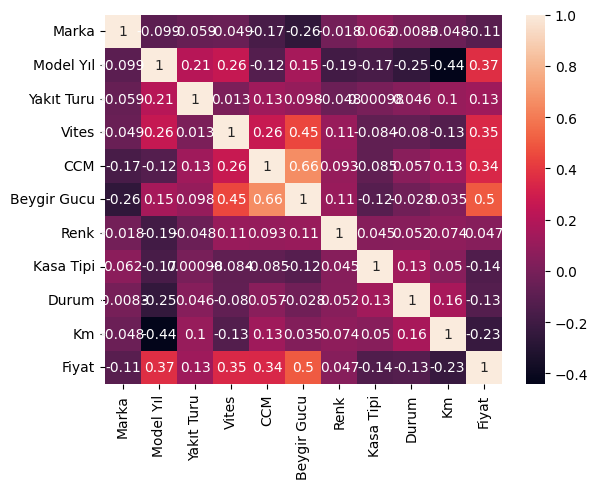

In [98]:
# correlation 
sns.heatmap(data_processed.corr(), annot=True)

# MODELS

In [32]:
# train test split
y = data_processed.pop("Fiyat")
X = data_processed

In [33]:
X.shape, y.shape

((3415, 10), (3415,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
X_train.shape, y_train.shape

((2561, 10), (2561,))

**ACCURACY FUNCTION**

In [35]:
def evaluate_model(model, test, real):
    predicted = model.predict(test)
    print("RMSE:\n"+f"{mean_squared_error(real, predicted)**2}"+"\n")
    print("R**2:\n"+f"{r2_score(real, predicted)}"+"\n")
    print("Mean Squared Error:\n"+f"{mean_squared_error(real, predicted)}"+"\n")

**LINER MODEL**

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
evaluate_model(lr, X_test, y_test)

RMSE:
5.837421840122882e+19

R**2:
0.5267096709374015

Mean Squared Error:
7640302245.410768



**Random Forest Regressor**

In [38]:
rf = RandomForestRegressor(max_depth=50, n_jobs=4, n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200, n_jobs=4)

In [39]:
evaluate_model(rf, X_test, y_test)

RMSE:
1.5755002692839807e+19

R**2:
0.7541182293087928

Mean Squared Error:
3969257196.609941



**KNNRegressor**

In [40]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
evaluate_model(knn_reg, X_test, y_test)

RMSE:
8.055014718484296e+19

R**2:
0.4440314050080876

Mean Squared Error:
8974973380.73172



**SVR**

In [46]:
svr = SVR(C=1, kernel="poly", verbose=True, gamma="scale")
svr.fit(X_train, y_train)

[LibSVM]..
*
optimization finished, #iter = 2055
obj = -172746074.360250, rho = -80813.500521
nSV = 2560, nBSV = 2560


SVR(C=1, kernel='poly', verbose=True)

In [47]:
evaluate_model(svr, X_test, y_test)

RMSE:
2.8683550480334166e+20

R**2:
-0.04914024044998544

Mean Squared Error:
16936218728.020185



**ANN**

In [151]:
model = Sequential()
model.add(InputLayer((None, 10)))
model.add(Dense(250, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(1))
model.summary()
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=[R2Score()], run_eagerly=True)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, None, 250)         2750      
                                                                 
 dense_116 (Dense)           (None, None, 250)         62750     
                                                                 
 dense_117 (Dense)           (None, None, 250)         62750     
                                                                 
 dense_118 (Dense)           (None, None, 250)         62750     
                                                                 
 dense_119 (Dense)           (None, None, 1)           251       
                                                                 
Total params: 191251 (747.07 KB)
Trainable params: 191251 (747.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
model.fit(X_train, y_train.astype(float), epochs=250, )

81/81 [==============================] - 1s 16ms/step - loss: 13289470976.0000 - r2_score: 0.4657


In [179]:
evaluate_model(model, X_test, y_test)

27/27 [==============================] - 0s 2ms/step
RMSE:
2.454848520780623e+19

R**2:
0.6930769958255802

Mean Squared Error:
4954642793.159385



**As a Result**
Best Model is **RandomForest** model with;
RMSE:
1.5755002692839807e+19

R**2:
0.7541182293087928

Mean Squared Error:
3969257196.609941

Second is **Ann** model with;
RMSE:
2.454848520780623e+19

R**2:
0.6930769958255802

Mean Squared Error:
4954642793.159385

third is **Linear regression** with;
RMSE:
5.837421840122882e+19

R**2:
0.5267096709374015

Mean Squared Error:
7640302245.410768

fourth is ;
**knn**

and last one **svr**